**MSDS 432 Mini Assignment 1**<br>
<br>
**Prepared by Vincent Pun**

In this exercise, we will begin to explore computational complexity and explore the differences in various **sorting and search algorithms**.  We will begin with the **base code** for sequential/linear and binary search as described in Chapter 1 of Grokking Algorithms (Bhargava 2016).  

Example code for the base algorithm is available in the GitHub site for the textbook.


In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np

import pandas as pd
from pandas import Categorical 
from pandas.plotting import scatter_matrix

import seaborn as sns
import scipy.stats as stats

import os
import time
from datetime import datetime

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [2]:
#Working Directory
os.getcwd()

'/Users/vincentpun/Documents/Northwestern/MSDS 432/Module 1/Mini Assignment 1'

To begin, let's generate some random data to work with. Ensure that a common random number seed is used to generate each of the arrays. We will make five arrays, each of length 512, 1024, 2048, 4096, and 8192 containing randomly generated uniformly distributed integers from 1 to 10000.  You may use the numpy package for this.  

Sort each of the random number arrays from smallest to largest.  You may use any algorithm to sort the data.

In [3]:
#Random number seed is used to generate each of the arrays 
np.random.seed(123)

#Five arrays, each of length 512, 1024, 2048, 4096, and 8192
#containing randomly generated uniformly distributed integers from 1 to 10000
#Use numpy package for this
#sort random number arrays from smallest to largest 

start1=time.time()
array1 = np.sort(np.random.uniform(low=0,high=10000,size=512))
end1=time.time()

start2=time.time()
array2 = np.sort(np.random.uniform(0,10000,1024))
end2=time.time()

start3=time.time()
array3 = np.sort(np.random.uniform(0,10000,2048))
end3=time.time()

start4=time.time()
array4 = np.sort(np.random.uniform(0,10000,4096))
end4=time.time()

start5=time.time()
array5 = np.sort(np.random.uniform(0,10000,8192))
end5=time.time()

#Sort Times
sort_time1 = 1000*(end1 - start1)
sort_time2 = 1000*(end2 - start2)
sort_time3 = 1000*(end3 - start3)
sort_time4 = 1000*(end4 - start4)
sort_time5 = 1000*(end5 - start5)

#Test sort time
print('sort_time1 is',sort_time1,'milliseconds')




sort_time1 is 0.3647804260253906 milliseconds


Execute the base search algorithm (binary search) (from the text and github code) for each of array, 
**noting the execution time for each array.**  
With each execution **use the maximum value of the random number array** as the number for which you are searching.

In [4]:
#Binary Search Function

#code from textbook
def search_iterative(list, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
      # ... check the middle element
      mid = (low + high) // 2
      guess = list[mid]
      # Found the item.
      if guess == item:
        return mid
      # The guess was too high.
      if guess > item:
        high = mid - 1
      # The guess was too low.
      else:
        low = mid + 1

    # Item doesn't exist
    return None

In [5]:

start1=time.time()
search_iterative(array1,max(array1))
end1=time.time()

start2=time.time()
search_iterative(array2,max(array2))
end2=time.time()

start3=time.time()
search_iterative(array3,max(array3))
end3=time.time()

start4=time.time()
search_iterative(array4,max(array4))
end4=time.time()

start5=time.time()
search_iterative(array5,max(array5))
end5=time.time()

binary_time1=1000*(end1-start1)
binary_time2=1000*(end2-start2)
binary_time3=1000*(end3-start3)
binary_time4=1000*(end4-start4)
binary_time5=1000*(end5-start5)

#Binary Search Times
binary_time1
binary_time2
binary_time3
binary_time4
binary_time5

511

1023

2047

4095

8191

2.271890640258789

2.122163772583008

2.591848373413086

2.9599666595458984

3.6988258361816406

Now we will compare this to a linear search.  Use python (perhaps with the Pandas package) to prepare a five-column table containing the following columns with all times in milliseconds:

-length of the random number array<br>
-sort time<br>
-linear search time for the sorted array<br>
-binary search time for the sorted array<br>
-binary search plus sort times<br>



In [6]:
#Linear Search Function
def linear_search(list, item):
    for x in range(0,len(list)):
        if list[x] == item:
            return x
    return None

In [7]:
start1=time.time()
linear_search(array1,max(array1))
end1=time.time()

start2=time.time()
linear_search(array2,max(array2))
end2=time.time()

start3=time.time()
linear_search(array3,max(array3))
end3=time.time()

start4=time.time()
linear_search(array4,max(array4))
end4=time.time()

start5=time.time()
linear_search(array5,max(array5))
end5=time.time()

linear_time1=1000*(end1-start1)
linear_time2=1000*(end2-start2)
linear_time3=1000*(end3-start3)
linear_time4=1000*(end4-start4)
linear_time5=1000*(end5-start5)

#Linear Search Times (End-Start)
linear_time1
linear_time2
linear_time3
linear_time4
linear_time5

511

1023

2047

4095

8191

2.6869773864746094

3.072023391723633

3.376007080078125

3.802061080932617

5.958080291748047

In [8]:
#Binary Search Plus Sort Times
combine_time1 = binary_time1 + sort_time1
combine_time2 = binary_time2 + sort_time2
combine_time3 = binary_time3 + sort_time3
combine_time4 = binary_time4 + sort_time4
combine_time5 = binary_time5 + sort_time5

In [9]:
#stuffing for the panda 
length = [512, 1024, 2048, 4096, 8192]
sort_time_list = [sort_time1,sort_time2,sort_time3,sort_time4,sort_time5]
linear_search_list = [linear_time1,linear_time2,linear_time3,linear_time4,linear_time5]
binary_search_list = [binary_time1,binary_time2,binary_time3,binary_time4,binary_time5]
combine_list = [combine_time1,combine_time2,combine_time3,combine_time4,combine_time5]

In [10]:
#Use python (perhaps with the Pandas package) to prepare a five-column table

#length of the random number array
#sort time
#linear search time for the sorted array
#binary search time for the sorted array
#binary search plus sort times

table = pd.DataFrame(list(zip(length,sort_time_list,linear_search_list,binary_search_list,combine_list)),columns=['Length','Sort Time','Linear Search Time','Binary Search Time','Binary Search Plus Sort Times'])

table

,Length,Sort Time,Linear Search Time,Binary Search Time,Binary Search Plus Sort Times
0,512,0.364780,2.686977,2.271891,2.636671
1,1024,0.220060,3.072023,2.122164,2.342224
2,2048,0.313282,3.376007,2.591848,2.905130
3,4096,0.357151,3.802061,2.959967,3.317118
4,8192,0.612974,5.958080,3.698826,4.311800


Use python matplotlib or Seaborn to generate a plot with the size of the random number array on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against array size for **linear and binary search algorithms** alone.  Discuss the results.

In [12]:
#Linear and Binary Search Times (Length is index)
df_plot1 = table[['Length','Linear Search Time','Binary Search Time']]
df_plot1

,Length,Linear Search Time,Binary Search Time
0,512,2.686977,2.271891
1,1024,3.072023,2.122164
2,2048,3.376007,2.591848
3,4096,3.802061,2.959967
4,8192,5.958080,3.698826


Text(0.5, 1.0, 'Linear and Binary Times')

([<matplotlib.axis.XTick at 0x7f9d390259a0>,
 [Text(0, 0, '512'),
  Text(0, 0, '1024'),
  Text(0, 0, '2048'),
  Text(0, 0, '4096'),
  Text(0, 0, '8192')])

Text(0.5, 0, 'Array Length')

Text(0, 0.5, 'Time (milliseconds)')

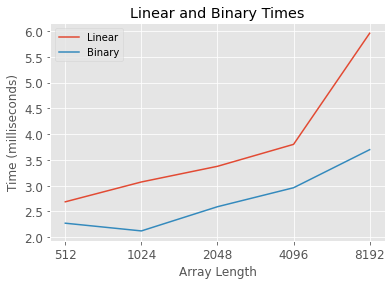

In [14]:
#Matplotlib
plt.title('Linear and Binary Times')
plt.style.use('ggplot')
#data
plt.plot(df_plot1['Linear Search Time'])
plt.plot(df_plot1['Binary Search Time'])

#X Y axis and labels
plt.xticks(df_plot1.index,df_plot1['Length'].values)
plt.xlabel('Array Length')
plt.ylabel('Time (milliseconds)')

#legend
plt.legend(['Linear','Binary'],loc='best')


Use Python matplotlib or Seaborn to generate a measure of the size of the data set on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against array size for each form of the algorithm being tested (last four columns of the table).  Discuss the results.

Text(0.5, 1.0, 'Array vs Search Algorithm Times')

([<matplotlib.axis.XTick at 0x7f9d390ff460>,
 [Text(0, 0, '512'),
  Text(0, 0, '1024'),
  Text(0, 0, '2048'),
  Text(0, 0, '4096'),
  Text(0, 0, '8192')])

Text(0.5, 0, 'Array Length')

Text(0, 0.5, 'Time (milliseconds)')

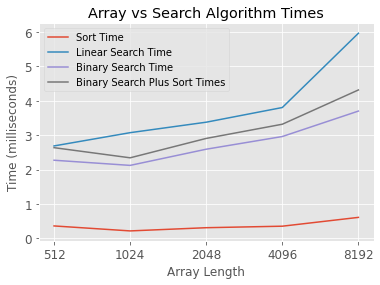

In [15]:
#Matplotlib
plt.title('Array vs Search Algorithm Times')
plt.style.use('ggplot')
#execution time against array size for each form of algorithm being tested (last four columns of table)
plt.plot(table['Sort Time'])
plt.plot(table['Linear Search Time'])
plt.plot(table['Binary Search Time'])
plt.plot(table['Binary Search Plus Sort Times'])

#X Y axis and labels

plt.xticks(table.index,table['Length'].values)
plt.xlabel('Array Length')
plt.ylabel('Time (milliseconds)')

#legend
plt.legend(['Sort Time','Linear Search Time','Binary Search Time','Binary Search Plus Sort Times'],loc='best')

Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

Program code should conform to best practices in software development, as described in the coding/software development textbook used in the course.

Set up a personal computer-based Git repository (or private repository on Github) for your work with algorithms this term. Beginning with this week's mini programming assignment, utilize Git as you work on software development.

**Executive Summary**<br>
<br>
In this assignment, we compared execution times of binary and linear search algorithms. The linear search algorithm is a  To conduct this comparison, we looked at the largest numbers in each instance and how many operations it would take for the algorithm to complete, which is known as the Big O notation. <Br>
<br>
Given that the linear algorithm begins its search at zero and makes its way to the largest number per group of numbers (our five random arrays), it clearly underperforms in relation to the binary search algorithm that would narrow the possible outcomes by half after each guess. As the length of the arrays increased, the run times grew at very different speeds, and it was clear that the binary search would remain a feasible option even at array lengths larger than what we tested. <br>
<br>
While testing the maximum number per group may have been disadvantageous for the linear search algorithm (it would have beaten the binary algorithm if we were looking for the first element), we learn that algorithms should always assume the worst case scenario. Thus, we can conclude that the binary search algorithm is more reliable in most cases, and data engineers should prefer it over a brute force method such as the linear search. 

